# **Adding** Necessary Libraries
**bold text**

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#We have imported necessary libraries for now. Moving forward we import more libraries according to the requirement.

In [3]:
# In[3]:


df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
for col in df.select_dtypes(include = 'object').columns.tolist():
  df2 = df.copy()




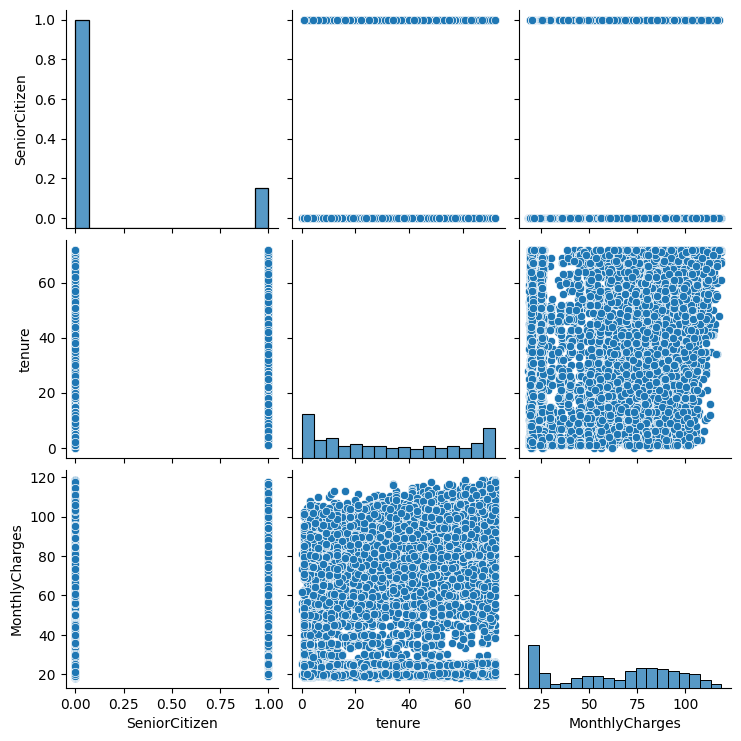

In [5]:

sns.pairplot(df)


In [6]:
'''
plt.scatter(x = 'TotalCharges', y = 'MonthlyCharges', data = df, label = 'Data Points')
coeff = np.polyfit(df['tenure'], df['MonthlyCharges'], 1)
poly = np.poly1d(coeff)
y_fit = poly(df['tenure'])
plt.plot(df['tenure'], y_fit, color = 'red', label = 'Best Fit Line')
plt.legend()

plt.show()
'''

"\nplt.scatter(x = 'TotalCharges', y = 'MonthlyCharges', data = df, label = 'Data Points')\ncoeff = np.polyfit(df['tenure'], df['MonthlyCharges'], 1)\npoly = np.poly1d(coeff)\ny_fit = poly(df['tenure'])\nplt.plot(df['tenure'], y_fit, color = 'red', label = 'Best Fit Line')\nplt.legend()\n\nplt.show()\n"

In [7]:
# In[4]:


#measure the shape of the data
df.shape

(7043, 21)

In [8]:
# In[5]:


#Check the info of the data
df.info()
#the info tells us the type of each column. Following which we check which column has numeric data or categorical data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:


#Check each column datatype
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# In[7]:


#Check if any column have null values. If all columns have values, it is easy for us to proceed with modelling.
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# In[8]:

'''
columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
columns2 = ['CustomerID', 'gender','Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', ' OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', '']
for i in columns:
    sns.histplot(df[i], kde=True)
    plt.show()

  '''


"\ncolumns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']\ncolumns2 = ['CustomerID', 'gender','Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', ' OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', '']\nfor i in columns:\n    sns.histplot(df[i], kde=True)\n    plt.show()\n\n  "

In [12]:
# In[9]:


df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# In[10]:


#The following table has customerID which is unnecessary for our modelling. Hence we can drop the column.
df.drop(['customerID'], axis = 1, inplace = True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# In[11]:


#We are converting the categorical variables into numericals
columns = ['gender', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn' ]
mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
df[columns] = df[columns].replace(mapping)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [15]:
# In[12]:


#Now we need to convert the columns which have categorical values
encode = LabelEncoder()
columns1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV','DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaymentMethod']
for i in columns1:
    df[i] = encode.fit_transform(df[i])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [17]:
# In[14]:


#As we can see that, all columns have converted into numericals expcept the TotalCharges. Though we see the column has
#numericals, it is considered to be an object. Hence we need to change it into numericals.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')



df_with_null_values = df['TotalCharges'].isnull()
df_with_null = df[df_with_null_values]
print(df_with_null)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
488        0              0        1           1       0             0   
753        1              0        0           1       0             1   
936        0              0        1           1       0             1   
1082       1              0        1           1       0             1   
1340       0              0        1           1       0             0   
3331       1              0        1           1       0             1   
3826       1              0        1           1       0             1   
4380       0              0        1           1       0             1   
5218       1              0        1           1       0             1   
6670       0              0        1           1       0             1   
6754       1              0        0           1       0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
488               1                0     

In [18]:
# In[15]:


#Now we have changed all columns into numericals
#We have to check is there any null values in the columns before applying ML model.
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# In[ ]:





# In[16]:


#It is shown that we have 11 null values in the 'TotalCharges' column.
#In order to fill them, we need to use Scikitlearn's SimpleImputer

imputing = SimpleImputer(strategy = 'mean')
df['TotalCharges'] = imputing.fit_transform(df[['TotalCharges']])




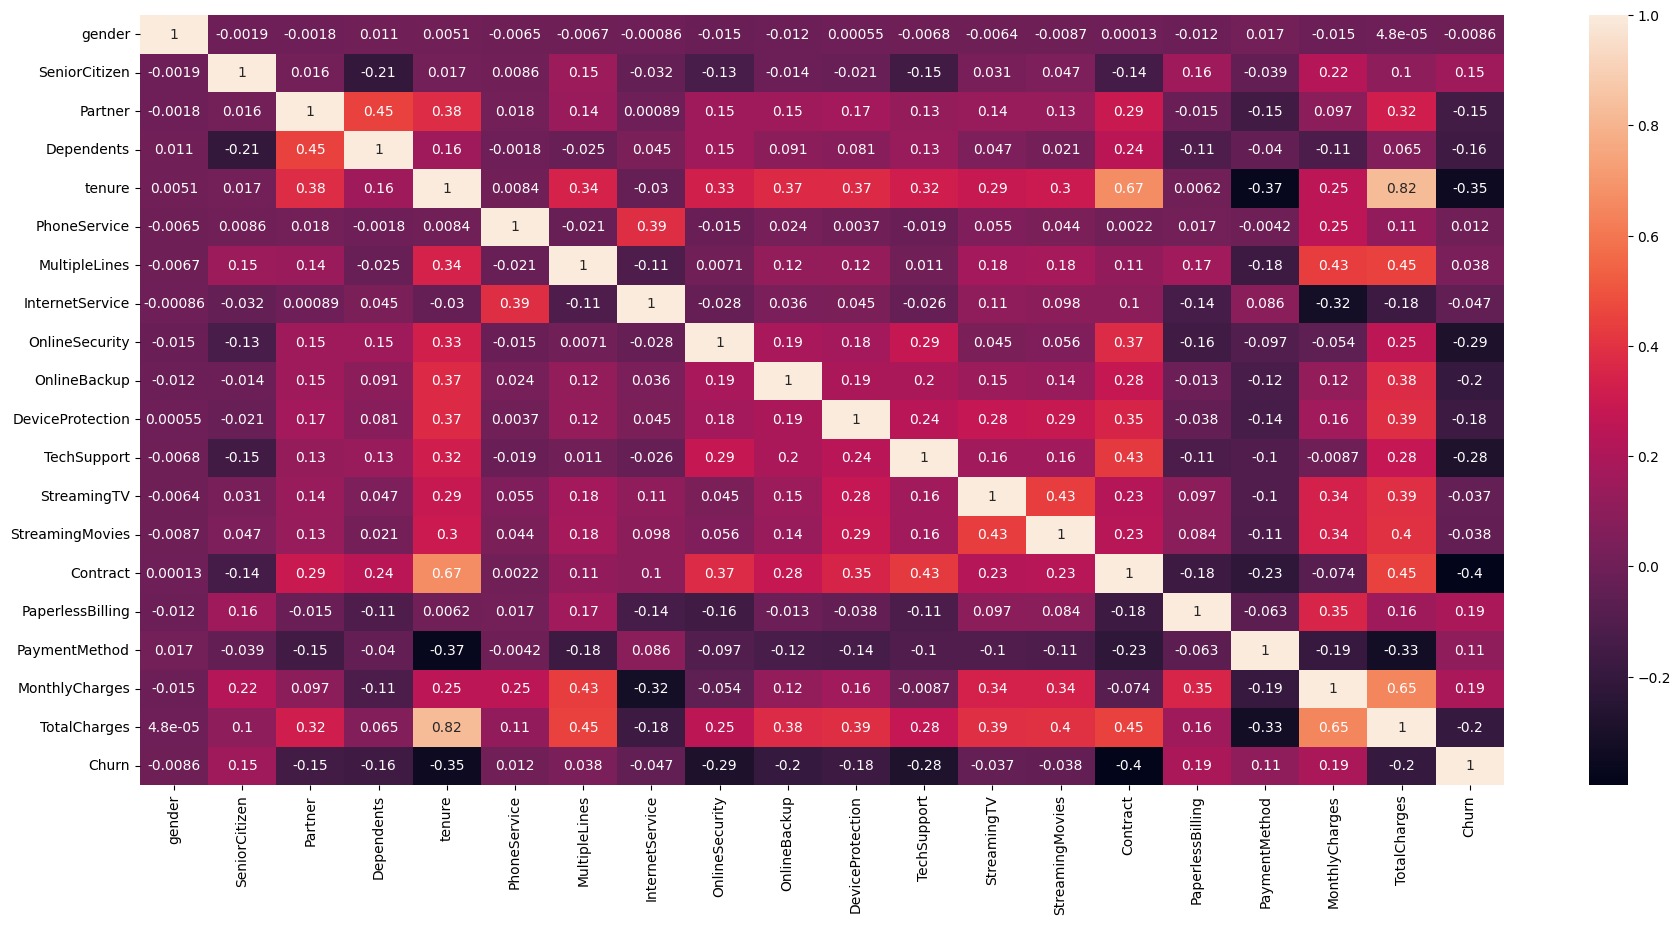

In [20]:
plt.figure(figsize = (22,10))
sns.heatmap(df.corr(), annot = True)
plt.show()


In [21]:
corr = df.corr()
corr['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [22]:
# In[17]:


#Now we observe there are no null values in columns.
#Now we can split the variables(columns) as x and y where x columns are the independent variables,
#y columns are the dependent variables


column_drop = ['OnlineBackup', 'OnlineSecurity','DeviceProtection','TechSupport','Contract', 'Churn']
x = df.drop(['Churn'], axis = 1)

'''
plt.figure(figsize = (22,10))
sns.heatmap(x.corr(), annot = True)
'''


y = df['Churn']



print(x)



      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [23]:
# In[20]:


#Hence we have all the numerical values from the given dataset.
#As we observe all these variables are unidentical to each other.
#example, if one variable has value 49, the other variable has value 0 or 2.
#while training a model, we need to do featurescaling in order to convert the data into identical values
#Following which, we can train the model and we get accurate data.
#Hence we need to do 'FeatureScaling'
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier



#In order to check whether we did scaling accurately, we can check the statistical description of the data


In [24]:

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x,y)
print(len(x_ros))


X_train, X_test, y_train, y_test = train_test_split(x_ros,y_ros, test_size = 0.2, random_state= 42)
print(X_train.shape)
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)
clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)





10348
(8278, 19)


In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)


array([[755, 266],
       [188, 861]])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1021
           1       0.76      0.82      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [29]:
comp = {'y_test': y_test, 'y_pred': y_pred}
dframe = pd.DataFrame(comp)
dframe.head()


,y_test,y_pred
9428,1,1
4593,0,0
5379,0,0
8918,1,1
6448,1,0
